In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
#from keras.applications.imagenet_utils import decode_predictions
from keras.models import load_model
from skimage.io import imread
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [2]:
def getLabels(pred_pro):
    tmp_list = list()
    with open('labels.txt', 'r') as f:
     myLabels = [line.strip() for line in f]
    for i in range(len(pred_pro[0])):
        tmp_list.append([myLabels[i],pred_pro[0][i]])
    return tmp_list

In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [4]:
my_model = load_model('my_model.h5')

In [5]:
#images = transform_img_fn([os.path.join('data','rose.jpg')])

image = Image.open('./data/rose.jpg')
image = image.resize((150,150))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,150,150,3)

#images = transform_img_fn([os.path.join('data','rose.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
#base_model = inc_net.InceptionV3(weights='imagenet', include_top=False)
#images = transform_img_fn([os.path.join('data','rose.jpg')])
preds = getLabels(my_model.predict(img))
preds = sorted(preds, key=lambda x: x[1], reverse=True)

['roses', 0.99305904]
['tulips', 0.0068924953]
['sunflowers', 4.827617e-05]
['daisy', 1.0592173e-07]
['dandelion', 8.399848e-09]


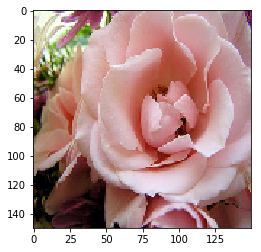

In [6]:
plt.imshow(image)
preds = sorted(preds, key=lambda x: x[1], reverse=True)
for x in preds:
    print(x)

In [7]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [8]:
explainer = lime_image.LimeImageExplainer()

In [9]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(img, my_model.predict, top_labels=5, hide_color=None, num_samples=1000)

RuntimeError: sequence argument must have length equal to input rank

In [10]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(3, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))



NameError: name 'explanation' is not defined